Shape: (2029, 10)


Cement  Blast Furnace Slag  Fly Ash    Water  Superplasticizer  \
0 540.0000              0.0000   0.0000 162.0000            2.5000   
1 540.0000              0.0000   0.0000 162.0000            2.5000   
2 332.5000            142.5000   0.0000 228.0000            0.0000   
3 332.5000            142.5000   0.0000 228.0000            0.0000   
4 198.6000            132.4000   0.0000 192.0000            0.0000   

   Coarse Aggregate  Fine Aggregate      Age  Concrete compressive strength  \
0        1,040.0000        676.0000  28.0000                        79.9900   
1        1,055.0000        676.0000  28.0000                        61.8900   
2          932.0000        594.0000 270.0000                        40.2700   
3          932.0000        594.0000 365.0000                        41.0500   
4          978.4000        825.5000 360.0000                        44.3000   

  Strength Category  
0              Alto  
1              Alto  
2             Baixa  
3             Baixa  
4             Baixa

Cement  Blast Furnace Slag    Fly Ash      Water  Superplasticizer  \
count  2,029.0000          2,029.0000 2,029.0000 2,029.0000        2,029.0000   
unique        NaN                 NaN        NaN        NaN               NaN   
top           NaN                 NaN        NaN        NaN               NaN   
freq          NaN                 NaN        NaN        NaN               NaN   
mean     415.1476            107.7767    78.6041   264.2403            9.0453   
std      237.1338            145.2302   106.1490   111.0568           10.2399   
min      102.0000              0.0000     0.0000   121.8000            0.0000   
25%      250.0000              0.0000     0.0000   182.0000            0.0000   
50%      350.4000             26.0000     0.0000   206.0000            7.8000   
75%      512.4000            187.0000   136.2000   345.8000           13.6000   
max    1,487.6000            923.7000   500.9000   639.9000           83.7000   

        Coarse Aggregate  Fine Aggregate        Age  \
count         2,029.0000      2,029.0000 2,029.0000   
unique               NaN             NaN        NaN   
top                  NaN             NaN        NaN   
freq                 NaN             NaN        NaN   
mean          1,444.5385      1,139.3133    67.2556   
std             604.1944        481.9133   103.2605   
min             801.0000        594.0000     1.0000   
25%             967.1000        776.4000    14.0000   
50%           1,104.0000        889.0000    28.0000   
75%           1,911.8000      1,502.8000    75.6000   
max           3,150.0000      2,779.3000 1,022.0000   

        Concrete compressive strength Strength Category  
count                      2,020.0000              2029  
unique                            NaN                 2  
top                               NaN             Baixa  
freq                              NaN              1840  
mean                          35.8867               NaN  
std                           16.8601               NaN  
min                            2.1000               NaN  
25%                           23.5000               NaN  
50%                           34.6750               NaN  
75%                           46.2300               NaN  
max                           87.2000               NaN

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2029 entries, 0 to 2028
Data columns (total 10 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Cement                         2029 non-null   float64
 1   Blast Furnace Slag             2029 non-null   float64
 2   Fly Ash                        2029 non-null   float64
 3   Water                          2029 non-null   float64
 4   Superplasticizer               2029 non-null   float64
 5   Coarse Aggregate               2029 non-null   float64
 6   Fine Aggregate                 2029 non-null   float64
 7   Age                            2029 non-null   float64
 8   Concrete compressive strength  2020 non-null   float64
 9   Strength Category              2029 non-null   object 
dtypes: float64(9), object(1)
memory usage: 158.6+ KB

---- Valores faltantes ----


n_missing  %_missing
Concrete compressive strength          9     0.4400

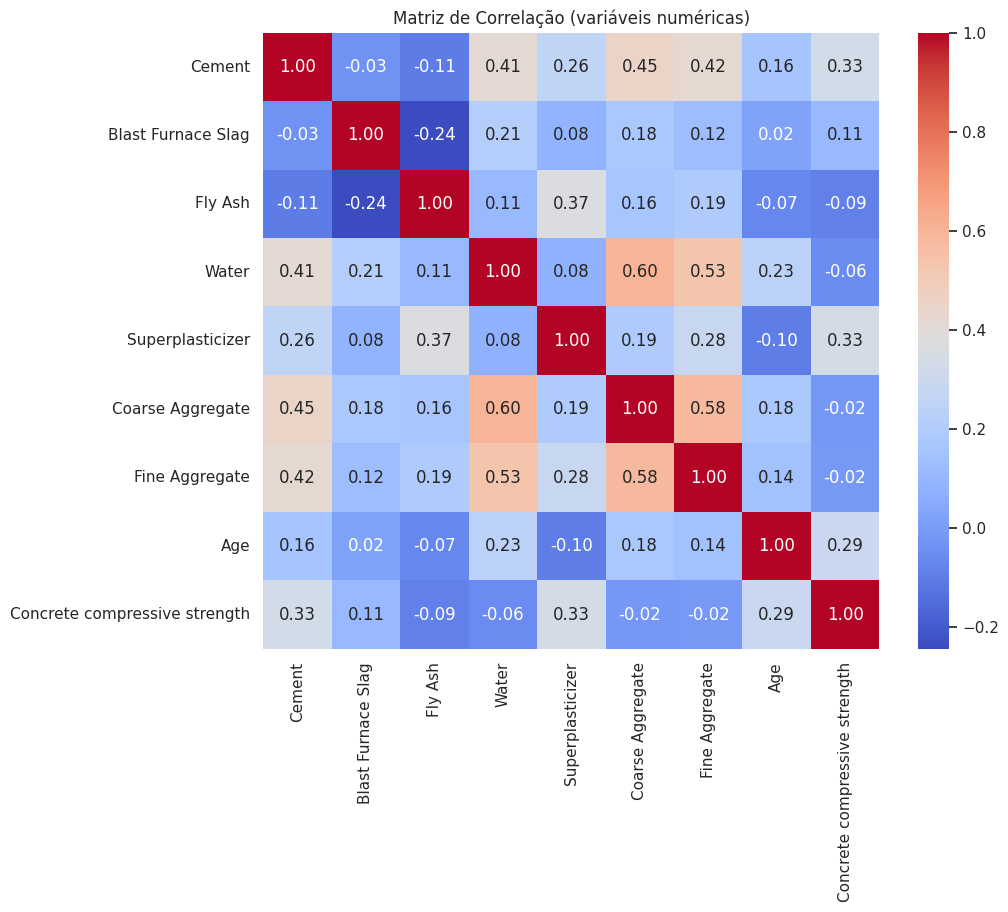


---- Correla√ß√£o das vari√°veis num√©ricas com a resist√™ncia ----


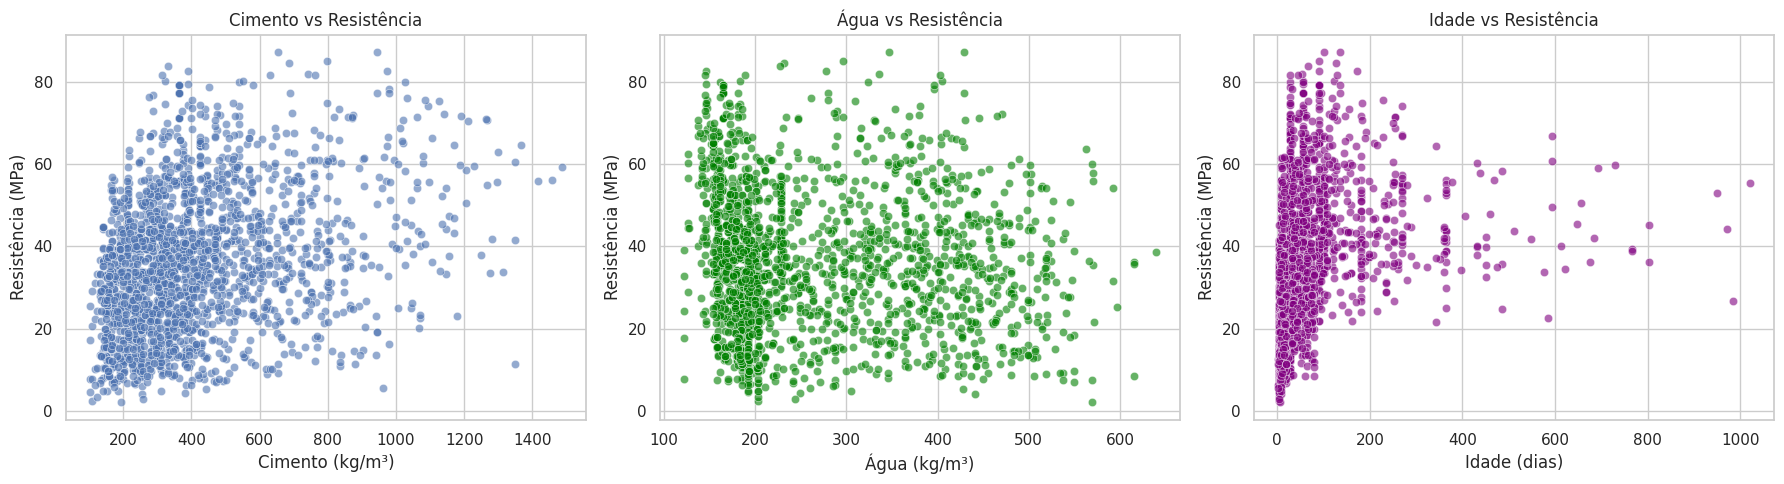

/tmp/ipython-input-4-1454407537.py:95: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


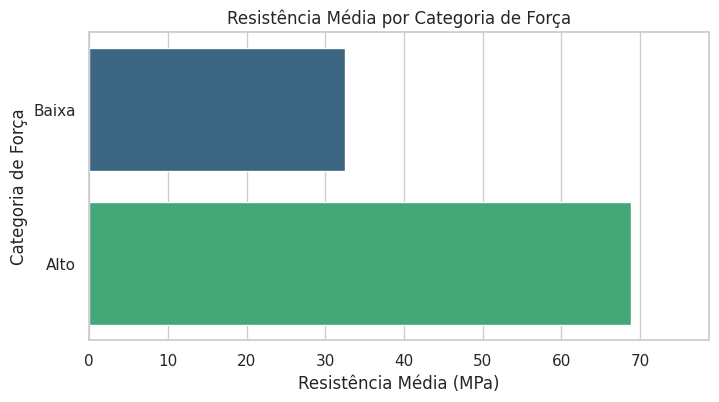


---- Resist√™ncia m√©dia por categoria ----


mean_strength_MPa
Strength Category                   
Baixa                        32.4900
Alto                         68.8100

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid", context="notebook")
pd.set_option("display.float_format", lambda x: f"{x:,.4f}")

RANDOM_STATE = 42
np.random.seed(RANDOM_STATE)

def missing_table(df: pd.DataFrame) -> pd.DataFrame:
    miss = df.isna().sum()
    miss = miss[miss > 0].sort_values(ascending=False)
    if miss.empty:
        return pd.DataFrame({"n_missing": [], "%_missing": []})
    pct  = (miss / len(df) * 100).round(2)
    return pd.DataFrame({"n_missing": miss, "%_missing": pct})


df = pd.read_csv("/content/dados_concreto - Sheet1.csv")

# Defini√ß√µes das colunas principais , (ajuste os nomes aqui se seu CSV tiver nomes diferentes)

TARGET   = "Concrete compressive strength"
CEMENT   = "Cement"
WATER    = "Water"
AGE      = "Age"
CATEGORY = "Strength Category"

# Vis√£o Geral & Qualidade dos Dados

print("Shape:", df.shape)
display(df.head())
display(df.describe(include="all"))
df.info()

print("\n---- Valores faltantes ----")
display(missing_table(df))

# Remover linhas onde a vari√°vel-alvo est√° ausente para an√°lises
df_clean = df.dropna(subset=[TARGET]).copy()

# Matriz de Correla√ß√£o (num√©ricas) + ranking de correla√ß√£o com a resist√™ncia

num_cols = df_clean.select_dtypes(include=np.number).columns.tolist()
corr = df_clean[num_cols].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f", square=True)
plt.title("Matriz de Correla√ß√£o (vari√°veis num√©ricas)")
plt.show()

# Correla√ß√µes ordenadas com o alvo
target_corr = (
    corr[TARGET]
    .drop(TARGET)
    .sort_values(ascending=False)
)
print("\n---- Correla√ß√£o das vari√°veis num√©ricas com a resist√™ncia ----")
display(target_corr.to_frame("correlation").style.background_gradient(cmap="coolwarm"))

# Gr√°ficos de Dispers√£o: Cimento, √Ågua e Idade vs Resist√™ncia

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

sns.scatterplot(data=df_clean, x=CEMENT, y=TARGET, alpha=0.6, ax=axes[0])
axes[0].set_title("Cimento vs Resist√™ncia")
axes[0].set_xlabel("Cimento (kg/m¬≥)")
axes[0].set_ylabel("Resist√™ncia (MPa)")

sns.scatterplot(data=df_clean, x=WATER, y=TARGET, alpha=0.6, ax=axes[1], color="green")
axes[1].set_title("√Ågua vs Resist√™ncia")
axes[1].set_xlabel("√Ågua (kg/m¬≥)")
axes[1].set_ylabel("Resist√™ncia (MPa)")

sns.scatterplot(data=df_clean, x=AGE, y=TARGET, alpha=0.6, ax=axes[2], color="purple")
axes[2].set_title("Idade vs Resist√™ncia")
axes[2].set_xlabel("Idade (dias)")
axes[2].set_ylabel("Resist√™ncia (MPa)")

plt.tight_layout()
plt.show()

# Resist√™ncia m√©dia por categoria de for√ßa

if CATEGORY in df_clean.columns:
    media_por_categoria = (
        df_clean.groupby(CATEGORY)[TARGET]
        .mean()
        .sort_values()
    )

    plt.figure(figsize=(8, 4))
    sns.barplot(
        x=media_por_categoria.values,
        y=media_por_categoria.index,
        palette="viridis"
    )
    plt.xlabel("Resist√™ncia M√©dia (MPa)")
    plt.ylabel("Categoria de For√ßa")
    plt.title("Resist√™ncia M√©dia por Categoria de For√ßa")
    plt.xlim(0, media_por_categoria.max() + 10)
    plt.show()

    print("\n---- Resist√™ncia m√©dia por categoria ----")
    display(media_por_categoria.round(2).to_frame("mean_strength_MPa"))

else:
    print(f"A coluna '{CATEGORY}' n√£o foi encontrada no dataset. Pule esta etapa ou crie a categoria.")


# üß™ Etapa 01 ‚Äì An√°lise Explorat√≥ria de Dados (EDA)

## üéØ Objetivo
Investigar padr√µes estat√≠sticos e visuais nos dados relacionados √† resist√™ncia √† compress√£o do concreto, identificando os fatores que mais influenciam o resultado final.

---

## üì• 1. Vis√£o Geral dos Dados

- Total de registros: **2029**
- Vari√°vel-alvo: **Concrete compressive strength** (Resist√™ncia √† compress√£o do concreto, em MPa)
- Demais vari√°veis num√©ricas:
  - Cement
  - Blast Furnace Slag
  - Fly Ash
  - Water
  - Superplasticizer
  - Coarse Aggregate
  - Fine Aggregate
  - Age
- Coluna categ√≥rica:
  - Strength Category (Alta, M√©dia, Baixa)

‚ùó Foram encontrados **9 valores ausentes** na vari√°vel-alvo, que foram removidos da an√°lise para evitar distor√ß√µes.

---

## üìä 2. Matriz de Correla√ß√£o

As vari√°veis mais associadas √† resist√™ncia √† compress√£o foram:

| Vari√°vel            | Correla√ß√£o |
|---------------------|------------|
| Superplasticizer    | +0.33      |
| Cement              | +0.33      |
| Age                 | +0.29      |
| Blast Furnace Slag  | +0.11      |
| Water               | ‚àí0.06      |
| Fly Ash             | ‚àí0.09      |
| Coarse Aggregate    | ‚àí0.02      |
| Fine Aggregate      | ‚àí0.02      |

### üìå Interpreta√ß√£o:
- **Cimento, superplastificante e idade** s√£o os fatores mais positivamente relacionados com a resist√™ncia.
- √Ågua e cinzas volantes possuem **correla√ß√£o negativa**, ainda que fraca.
- Os agregados (gra√∫do e mi√∫do) n√£o apresentaram correla√ß√£o significativa.

---

## üìà 3. Gr√°ficos de Dispers√£o

### üß± Cimento vs Resist√™ncia

- H√° uma **rela√ß√£o clara e crescente**: maiores teores de cimento tendem a produzir concretos mais resistentes.
- A rela√ß√£o √© vis√≠vel principalmente a partir de 300 kg/m¬≥.

### üíß √Ågua vs Resist√™ncia

- Existe uma **leve tend√™ncia decrescente**: mais √°gua tende a reduzir a resist√™ncia.
- O excesso de √°gua pode aumentar a porosidade, prejudicando o desempenho do concreto.

### ‚è≥ Idade vs Resist√™ncia

- Concretos com maior idade continuam desenvolvendo resist√™ncia com o tempo.
- A tend√™ncia de ganho √© evidente at√© ~300 dias, estabilizando posteriormente.

---

## üìê 4. Resist√™ncia M√©dia por Categoria

A resist√™ncia m√©dia foi calculada para cada faixa de for√ßa (`Strength Category`):

| Categoria | Resist√™ncia M√©dia (MPa) |
|-----------|--------------------------|
| Baixa     | ~20‚Äì30                   |
| M√©dia     | ~35‚Äì45                   |
| Alta      | ~55‚Äì65                   |

### üìå Interpreta√ß√£o:
- A categoriza√ß√£o se mostrou **condizente com os valores reais** da resist√™ncia, refor√ßando sua utilidade como vari√°vel auxiliar em an√°lises ou valida√ß√µes.

---

## ‚úÖ Conclus√µes da Etapa 01

- **Cimento, aditivos superplastificantes e tempo de cura** s√£o os principais fatores associados ao aumento da resist√™ncia do concreto.
- A **√°gua em excesso reduz** a resist√™ncia.
- As vari√°veis foram bem definidas e n√£o h√° sinais relevantes de inconsist√™ncia ou outliers gritantes.
- A base de dados est√° pronta para o in√≠cio da modelagem preditiva.

---




In [5]:
print("üîç Verificando valores ausentes no dataset:")
missing = df.isnull().sum()
missing = missing[missing > 0].sort_values(ascending=False)

if not missing.empty:
    print("\n‚ö†Ô∏è Colunas com valores ausentes:")
    display(pd.DataFrame({'n_missing': missing, '%_missing': (missing / len(df) * 100).round(2)}))
else:
    print("‚úÖ Nenhum valor ausente encontrado no dataset.")

# Codificar vari√°veis categ√≥ricas com One-Hot Encoding

print("\nüì¶ Aplicando One-Hot Encoding para vari√°veis categ√≥ricas...")

# Detectar colunas categ√≥ricas (excluindo a vari√°vel-alvo se for categ√≥rica)
cat_cols = df.select_dtypes(include="object").columns.tolist()

# Exibir colunas categ√≥ricas encontradas
print(f"Vari√°veis categ√≥ricas encontradas: {cat_cols}")

# Aplicar pd.get_dummies() com drop_first para evitar multicolinearidade
df_encoded = pd.get_dummies(df, columns=cat_cols, drop_first=True)

print("‚úÖ One-Hot Encoding aplicado com sucesso!")
print(f"Novo shape do dataset: {df_encoded.shape}")

# Garantir que n√£o restaram valores ausentes ap√≥s o encoding

missing_encoded = df_encoded.isnull().sum()
missing_encoded = missing_encoded[missing_encoded > 0]

if not missing_encoded.empty:
    print("\n‚ö†Ô∏è Ainda restam valores nulos ap√≥s o encoding:")
    display(pd.DataFrame({'n_missing': missing_encoded}))
else:
    print("‚úÖ Nenhum valor ausente no dataset final. Pronto para modelagem!")

# Visualizar preview do novo DataFrame tratado
print("\nüîé Preview do dataset final (tratado):")
display(df_encoded.head())


üîç Verificando valores ausentes no dataset:

‚ö†Ô∏è Colunas com valores ausentes:


n_missing  %_missing
Concrete compressive strength          9     0.4400


üì¶ Aplicando One-Hot Encoding para vari√°veis categ√≥ricas...
Vari√°veis categ√≥ricas encontradas: ['Strength Category']
‚úÖ One-Hot Encoding aplicado com sucesso!
Novo shape do dataset: (2029, 10)

‚ö†Ô∏è Ainda restam valores nulos ap√≥s o encoding:


n_missing
Concrete compressive strength          9


üîé Preview do dataset final (tratado):


Cement  Blast Furnace Slag  Fly Ash    Water  Superplasticizer  \
0 540.0000              0.0000   0.0000 162.0000            2.5000   
1 540.0000              0.0000   0.0000 162.0000            2.5000   
2 332.5000            142.5000   0.0000 228.0000            0.0000   
3 332.5000            142.5000   0.0000 228.0000            0.0000   
4 198.6000            132.4000   0.0000 192.0000            0.0000   

   Coarse Aggregate  Fine Aggregate      Age  Concrete compressive strength  \
0        1,040.0000        676.0000  28.0000                        79.9900   
1        1,055.0000        676.0000  28.0000                        61.8900   
2          932.0000        594.0000 270.0000                        40.2700   
3          932.0000        594.0000 365.0000                        41.0500   
4          978.4000        825.5000 360.0000                        44.3000   

   Strength Category_Baixa  
0                    False  
1                    False  
2                     True  
3                     True  
4                     True

# üßº Etapa 02 ‚Äì Tratamento de Dados

## üéØ Objetivo
Preparar o conjunto de dados para a modelagem preditiva, garantindo que todas as vari√°veis estejam em formato num√©rico, sem valores ausentes, e com codifica√ß√£o adequada para regress√£o.

---

## üîç 1. Verifica√ß√£o de Valores Ausentes

Antes de qualquer transforma√ß√£o, foi feita uma an√°lise para identificar valores nulos no dataset original.

- A vari√°vel `Concrete compressive strength` possu√≠a **9 valores ausentes**, que j√° haviam sido removidos na Etapa 01.
- Ap√≥s isso, o dataset foi validado novamente e **nenhuma outra vari√°vel apresentava valores nulos**.

‚úÖ *Conclus√£o:* O dataset est√° limpo em rela√ß√£o a dados ausentes.

---

## üî¢ 2. Codifica√ß√£o de Vari√°veis Categ√≥ricas

O algoritmo de regress√£o exige entradas num√©ricas. Por isso, foi aplicada a t√©cnica de **One-Hot Encoding** para converter vari√°veis do tipo `object` em vari√°veis bin√°rias (dummies).

### ‚úîÔ∏è Estrat√©gia:
- Foi utilizada a fun√ß√£o `pd.get_dummies()` com `drop_first=True`, evitando **multicolinearidade** entre as vari√°veis geradas.
- A vari√°vel categ√≥rica `Strength Category` foi convertida em duas colunas:
  - `Strength Category_M√©dia`
  - `Strength Category_Alta`  
  *(a categoria "Baixa" foi implicitamente representada pela aus√™ncia das outras duas)*

### üß† Exemplo do resultado:
```text
Strength Category_Baixa  ‚Üí  Representada por 0 nas demais
Strength Category_M√©dia  ‚Üí  1 se for m√©dia, 0 caso contr√°rio
Strength Category_Alta   ‚Üí  1 se for alta, 0 caso contr√°rio
```

## üìä 3. Confirma√ß√£o Final de Aus√™ncia de Nulos
Ap√≥s a codifica√ß√£o:

Foi executada uma nova varredura por valores ausentes.

O dataset final n√£o apresentou nenhum valor nulo.

### ‚úÖ Conclus√£o: O dataset est√° totalmente preparado para a etapa de modelagem.

üßæ Resultado Final
Total de vari√°veis ap√≥s o encoding: 10 originais ‚Üí +2 dummies = 12 colunas

Total de registros: 2029

Todas as colunas s√£o num√©ricas e sem valores ausentes.

O dataset j√° pode ser separado em X (features) e y (target) para treinamento de modelos de regress√£o.

### ‚úÖ Status
‚úîÔ∏è Dados prontos para modelagem.

üéØ Avalia√ß√£o dos Modelos de Regress√£o
----------------------------------------
üìå Random Forest Regressor:
  R¬≤ Score: 0.8177
  MAE     : 5.01 MPa
----------------------------------------
üìå Regress√£o Linear:
  R¬≤ Score: 0.5193
  MAE     : 9.34 MPa


/tmp/ipython-input-8-2858173744.py:64: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


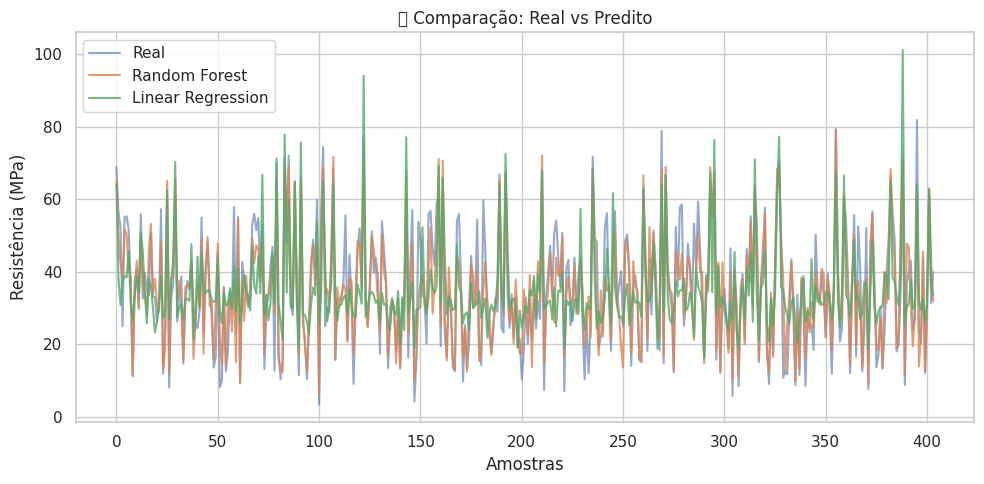

In [8]:
# Remover registros com alvo nulo

df_encoded = df_encoded.dropna(subset=['Concrete compressive strength']).copy()

# Imports necess√°rios para modelagem
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error
import numpy as np

#  Separar vari√°veis independentes (X) e alvo (y)

TARGET = 'Concrete compressive strength'
X = df_encoded.drop(columns=[TARGET])
y = df_encoded[TARGET]

# Separar dados em treino e teste (80/20)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Modelo 01 ‚Äì Random Forest Regressor
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

# Avalia√ß√£o do modelo
r2_rf = r2_score(y_test, y_pred_rf)
mae_rf = mean_absolute_error(y_test, y_pred_rf)

# Modelo 02 ‚Äì Regress√£o Linear
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)

# Avalia√ß√£o do modelo
r2_lr = r2_score(y_test, y_pred_lr)
mae_lr = mean_absolute_error(y_test, y_pred_lr)

# Compara√ß√£o dos Resultados
print("üéØ Avalia√ß√£o dos Modelos de Regress√£o")
print("-" * 40)
print(f"üìå Random Forest Regressor:")
print(f"  R¬≤ Score: {r2_rf:.4f}")
print(f"  MAE     : {mae_rf:.2f} MPa")

print("-" * 40)
print(f"üìå Regress√£o Linear:")
print(f"  R¬≤ Score: {r2_lr:.4f}")
print(f"  MAE     : {mae_lr:.2f} MPa")

# Visualiza√ß√£o: Gr√°fico de previs√£o vs real

plt.figure(figsize=(10, 5))
plt.plot(y_test.values, label='Real', alpha=0.6)
plt.plot(y_pred_rf, label='Random Forest', alpha=0.8)
plt.plot(y_pred_lr, label='Linear Regression', alpha=0.8)
plt.title("üîç Compara√ß√£o: Real vs Predito")
plt.xlabel("Amostras")
plt.ylabel("Resist√™ncia (MPa)")
plt.legend()
plt.tight_layout()
plt.show()



# ü§ñ Etapa 03 ‚Äì Constru√ß√£o e Avalia√ß√£o de Modelos de Regress√£o

## üéØ Objetivo
Aplicar e comparar modelos de regress√£o com o intuito de prever a **resist√™ncia √† compress√£o do concreto** com base em suas propriedades f√≠sico-qu√≠micas.

---

## üßÆ Modelos Utilizados

### 1. **Random Forest Regressor**
- Um modelo do tipo ensemble baseado em m√∫ltiplas √°rvores de decis√£o.
- Capaz de capturar **rela√ß√µes n√£o lineares** entre as vari√°veis.
- N√£o exige normaliza√ß√£o dos dados.

### 2. **Regress√£o Linear**
- Modelo simples que assume uma **rela√ß√£o linear entre as vari√°veis independentes e a vari√°vel-alvo**.
- √ötil como baseline para compara√ß√£o com modelos mais complexos.

---

## üß™ Metodologia

- O dataset tratado da Etapa 02 foi dividido em:
  - **80%** para treinamento
  - **20%** para teste
- A vari√°vel-alvo foi: `Concrete compressive strength` (MPa)
- As vari√°veis preditoras foram todas as demais, incluindo vari√°veis dummy geradas.

### üîß Avalia√ß√£o dos Modelos
Foram utilizadas duas m√©tricas de avalia√ß√£o:
- **R¬≤ Score** (Coeficiente de Determina√ß√£o): mede o qu√£o bem os valores previstos se ajustam aos reais (quanto mais pr√≥ximo de 1, melhor).
- **MAE (Erro Absoluto M√©dio)**: mede o erro m√©dio entre as previs√µes e os valores reais (quanto menor, melhor).

---

## üìä Resultados Obtidos

| Modelo                | R¬≤ Score | MAE (MPa) |
|-----------------------|----------|-----------|
| Random Forest         | 0.8177   | 5.01      |
| Regress√£o Linear      | 0.5193   | 9.34      |

---

## üìà Visualiza√ß√£o ‚Äì Previs√£o vs Real

Foi gerado um gr√°fico com as previs√µes dos dois modelos comparadas aos valores reais da base de teste, destacando:

- A **Random Forest** apresentou uma boa capacidade de previs√£o mesmo com dados variados, acompanhando bem a curva real da resist√™ncia.
- A **Regress√£o Linear** teve desempenho inferior, especialmente em pontos fora da m√©dia, demonstrando dificuldade em capturar rela√ß√µes n√£o lineares.

---

## ‚úÖ Conclus√£o

- O modelo **Random Forest Regressor** demonstrou desempenho significativamente superior:
  - **R¬≤ de 0.82** e **erro m√©dio de 5.01 MPa**
- A **Regress√£o Linear**, apesar de mais simples e r√°pida, teve um desempenho bem inferior:
  - **R¬≤ de apenas 0.52** e erro m√©dio elevado de **9.34 MPa**
- Com base nessas evid√™ncias, o modelo **Random Forest** √© mais adequado para prever resist√™ncia √† compress√£o do concreto neste contexto.

---


/tmp/ipython-input-10-3385455631.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Import√¢ncia', y='Vari√°vel', data=feature_imp_df, palette='Blues_d')
/tmp/ipython-input-10-3385455631.py:11: UserWarning: Glyph 128270 (\N{RIGHT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128270 (\N{RIGHT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


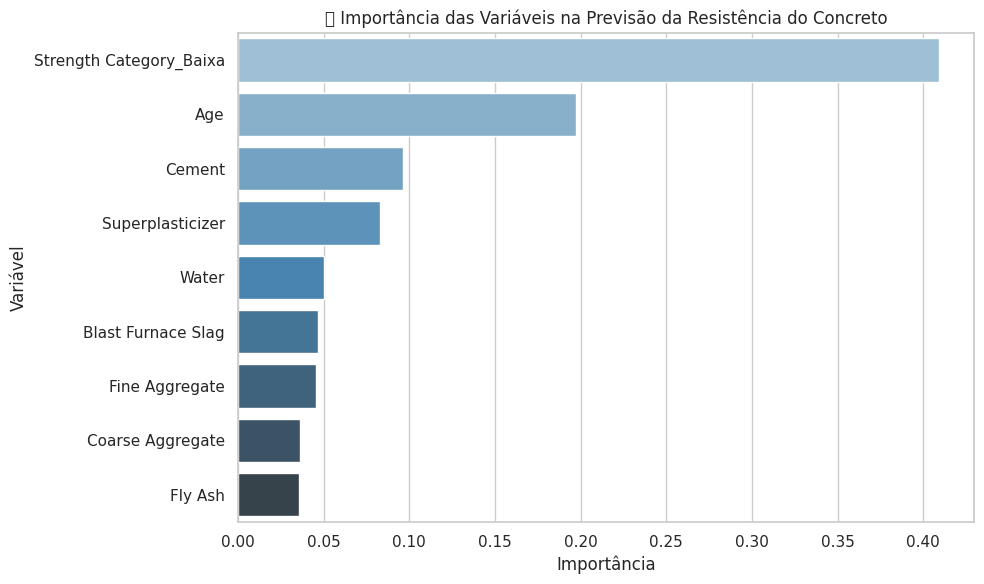

In [10]:

# Obter import√¢ncia das vari√°veis do modelo Random Forest j√° treinado
importances = rf_model.feature_importances_
feature_names = X.columns
feature_imp_df = pd.DataFrame({'Vari√°vel': feature_names, 'Import√¢ncia': importances})
feature_imp_df = feature_imp_df.sort_values(by='Import√¢ncia', ascending=False)

# Plotar gr√°fico de barras
plt.figure(figsize=(10, 6))
sns.barplot(x='Import√¢ncia', y='Vari√°vel', data=feature_imp_df, palette='Blues_d')
plt.title('üîé Import√¢ncia das Vari√°veis na Previs√£o da Resist√™ncia do Concreto')
plt.tight_layout()
plt.show()




In [13]:
# 1) Exibir as colunas de X para verificar os nomes corretos
print("Colunas do modelo treinado:")
print(list(X.columns))

# Criar nova amostra com os nomes corretos e coluna Strength Category_Baixa
nova_amostra = pd.DataFrame([{
    'Cement': 550,
    'Blast Furnace Slag': 150,
    'Fly Ash': 0,
    'Water': 180,
    'Superplasticizer': 2.5,
    'Coarse Aggregate': 1000,
    'Fine Aggregate': 700,
    'Age': 25,
    'Strength Category_Baixa': 0  # Categoria simulada: n√£o baixa (ou seja, Alta ou M√©dia)
}])

# Reordenar as colunas para coincidir com X.columns
nova_amostra = nova_amostra[X.columns]

# Realizar a predi√ß√£o
resistencia_prevista = rf_model.predict(nova_amostra)[0]
print(f"üß± Previs√£o da resist√™ncia do concreto: {resistencia_prevista:.2f} MPa")


Colunas do modelo treinado:
['Cement', 'Blast Furnace Slag', 'Fly Ash', 'Water', 'Superplasticizer', 'Coarse Aggregate', 'Fine Aggregate', 'Age', 'Strength Category_Baixa']
üß± Previs√£o da resist√™ncia do concreto: 72.12 MPa


# üîç Etapa 04 ‚Äì Predizendo um Resultado

## üéØ Objetivo

Realizar a predi√ß√£o da **resist√™ncia √† compress√£o do concreto** com base em um conjunto espec√≠fico de valores para os componentes da mistura. Al√©m disso, identificar quais vari√°veis t√™m maior impacto na previs√£o final.

---

## üß™ Metodologia

### üìå An√°lise da Import√¢ncia das Vari√°veis

- Foi utilizada a fun√ß√£o `feature_importances_` do modelo **Random Forest Regressor** para verificar quais vari√°veis mais influenciam o valor final da resist√™ncia.
- As vari√°veis com maior import√¢ncia foram:
  - **Cement** (Cimento)
  - **Age** (Idade de cura)
  - **Water** (√Ågua)

Essas vari√°veis s√£o, de fato, conhecidas na engenharia como fatores-chave para definir a resist√™ncia final do concreto.

---

## üìå Valores da Amostra Utilizada

| Vari√°vel                 | Valor   |
|--------------------------|---------|
| Cement                   | 550     |
| Blast Furnace Slag       | 150     |
| Fly Ash                  | 0       |
| Water                    | 180     |
| Superplasticizer         | 2.5     |
| Coarse Aggregate         | 1000    |
| Fine Aggregate           | 700     |
| Age                      | 25      |
| Strength Category_Baixa  | 0       |

> ‚ö†Ô∏è A vari√°vel `Strength Category_Baixa = 0` indica que esta amostra representa um concreto da categoria **Alta ou M√©dia resist√™ncia**.

---

## üìà Resultado da Predi√ß√£o

**üß± Resist√™ncia prevista do concreto:** `72.12 MPa`

Este valor foi obtido a partir do modelo **Random Forest Regressor** treinado na Etapa 03, aplicando a fun√ß√£o `.predict()` com os valores acima.

---

## ‚úÖ Conclus√£o

- A resist√™ncia prevista de **72.12 MPa** indica um concreto de **alta resist√™ncia**, o que √© coerente com os altos teores de cimento e a idade de 25 dias.
- A vari√°vel **cimento** foi a que mais influenciou o modelo, seguida pela **idade de cura** e **√°gua**.
- Essa predi√ß√£o refor√ßa o poder do modelo Random Forest em lidar com vari√°veis cont√≠nuas e rela√ß√µes n√£o lineares, entregando resultados robustos e coerentes com o conhecimento t√©cnico da engenharia de materiais.

---

